In [215]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from AI.algorithms_from_scratch.data_plotting import Plots


In [216]:

# IMPORT DATASET
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [217]:
# SCALING - NOT NEEDED INT DECISION TREES

In [218]:
# SPLIT DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

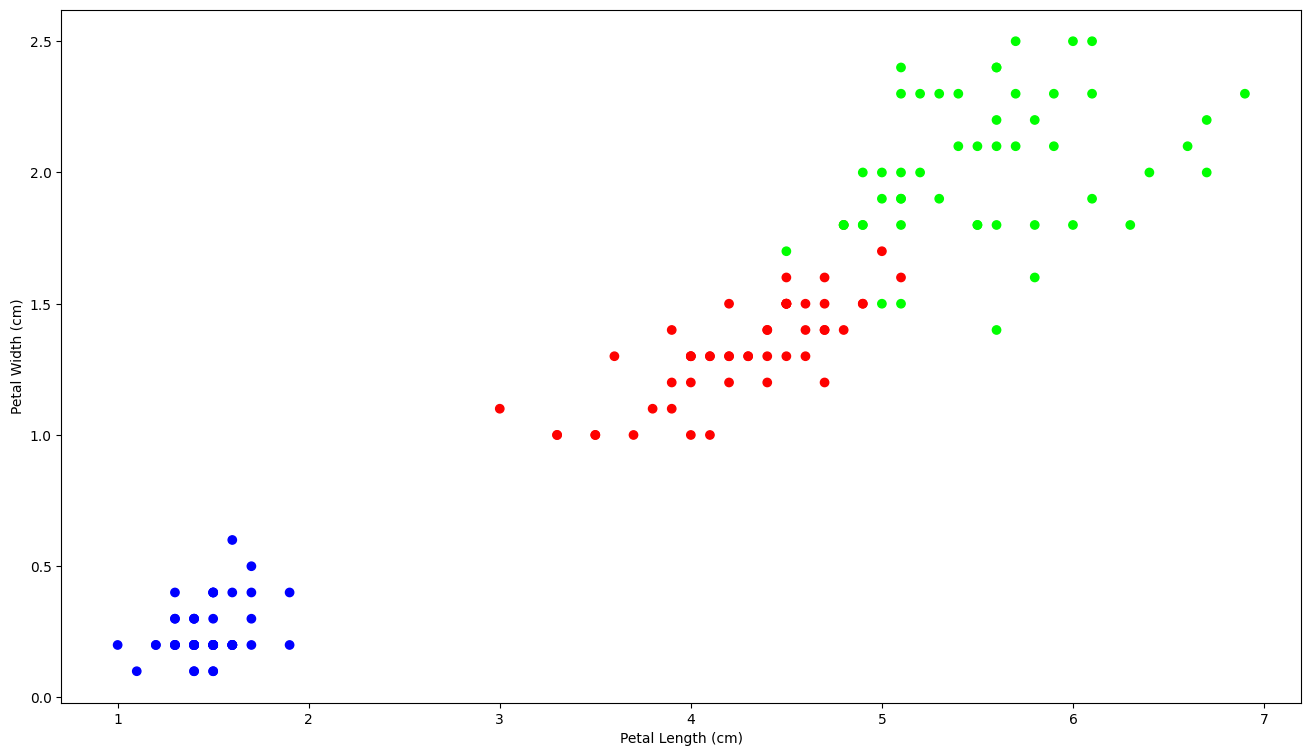

In [219]:
# PLOT DATASET
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [220]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class DecisionTreeClassifier(BaseEstimator, ClassifierMixin):
# class DecisionTreeClassifier(BaseEstimator, ClassifierMixin): # ppbly not needed to inherit
    def __init__(self, min_samples_split=2, max_depth=float("inf")):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None
    
    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value
    
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)
        return self  # Returning self for compatibility with sklearn's pipeline and grid search
    
    def predict(self, X):
        return np.array([self._predict_input(x, self.tree) for x in X])
    
    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))
        
        # Stopping conditions
        if (depth >= self.max_depth
                or num_labels == 1
                or num_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)
        
        # Find the best split
        best_gini = 1
        best_index = None
        best_threshold = None
        
        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                gini = self._gini_index(X[:, feature_index], y, threshold)
                if gini < best_gini:
                    best_gini = gini
                    best_index = feature_index
                    best_threshold = threshold
        
        if best_gini == 1:
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)
        
        # Grow the children
        left_indices = X[:, best_index] <= best_threshold
        right_indices = X[:, best_index] > best_threshold
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return self.Node(feature_index=best_index, threshold=best_threshold,
                         left=left_subtree, right=right_subtree)
    
    def _gini_index(self, feature_column, y, threshold):
        left_indices = feature_column <= threshold
        right_indices = feature_column > threshold
        
        if len(left_indices) == 0 or len(right_indices) == 0:
            return 1
        
        left_gini = self._gini(y[left_indices])
        right_gini = self._gini(y[right_indices])
        left_weight = len(y[left_indices]) / len(y)
        right_weight = len(y[right_indices]) / len(y)
        return left_weight * left_gini + right_weight * right_gini
    
    def _gini(self, y):
        m = len(y)
        if m == 0:
            return 1
        class_counts = np.bincount(y)
        probabilities = class_counts / m
        return 1 - np.sum(probabilities ** 2)
    
    def _most_common_label(self, y):
        return np.bincount(y).argmax()
    
    def _predict_input(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_input(x, node.left)
        return self._predict_input(x, node.right)


In [221]:
# TRAIN THE MODEL
dc_clf = DecisionTreeClassifier(max_depth=2)
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [222]:
# PREDICT
y_pred = dc_clf.predict(X_test)


In [223]:
# Just playing around with predictions
dc_clf.predict([[1.91, 0.4]])

array([1], dtype=int64)

In [224]:
# EVALUATE
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9666666666666667

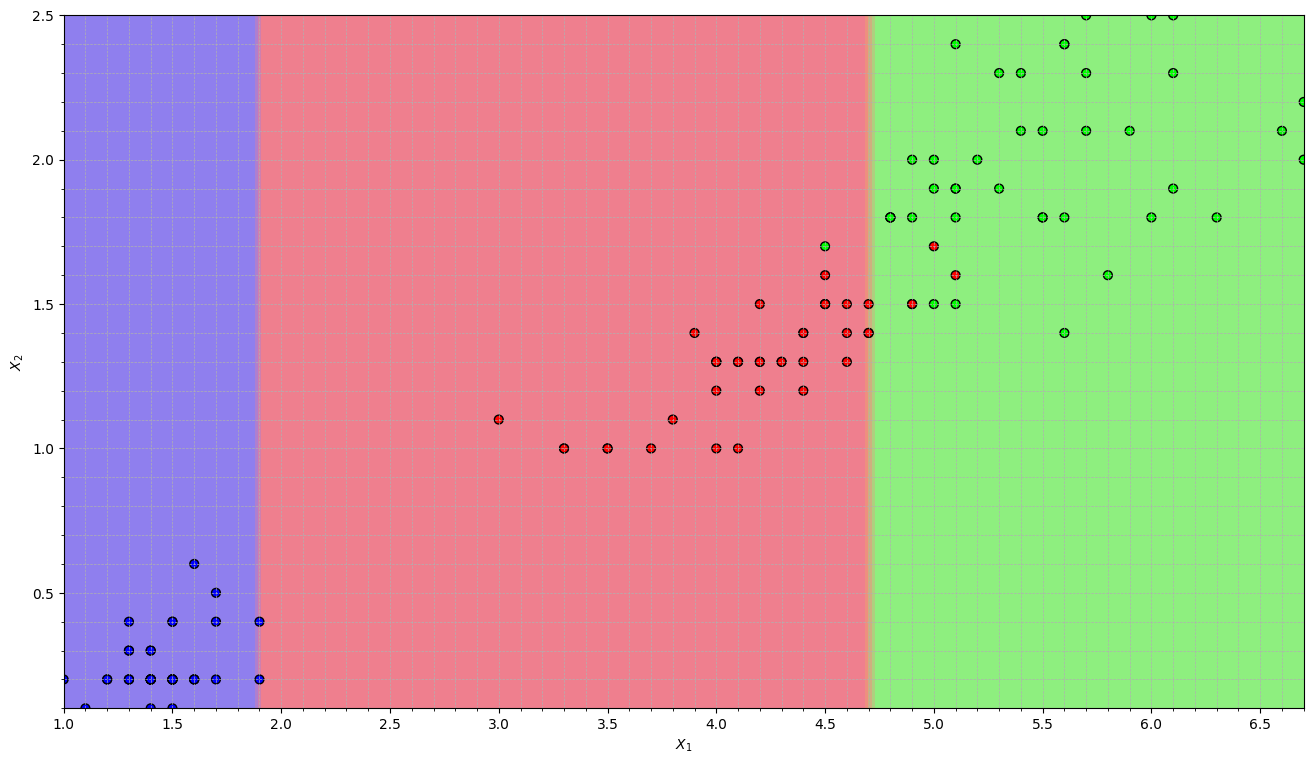

In [225]:
# PLOT
plot1 = Plots()
plot1.plot_decision_boundary(dc_clf, X_train, y_train)


# EXAMPLE 2

In [226]:
# CREATE DATASET - MOONS
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

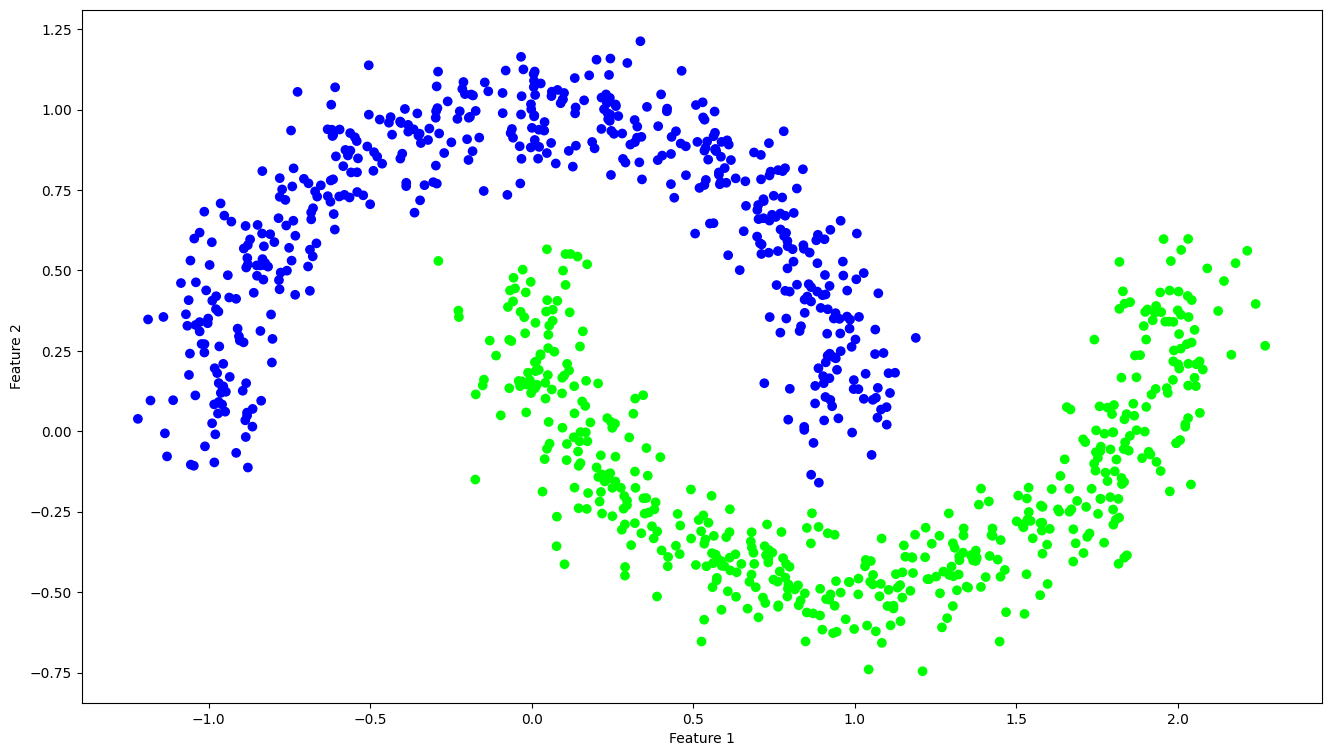

In [227]:
# PLOT DATASET
plt.figure(figsize=(16, 9))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [228]:
# SPLIT DATASET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [229]:
# TRAIN THE MODEL
dc_clf2 = DecisionTreeClassifier(max_depth=9)
dc_clf2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=9)

In [230]:
# PREDICT

y_pred2 = dc_clf2.predict(X_test)


In [231]:
# EVALUATE
accuracy_score(y_test, y_pred2)


0.98

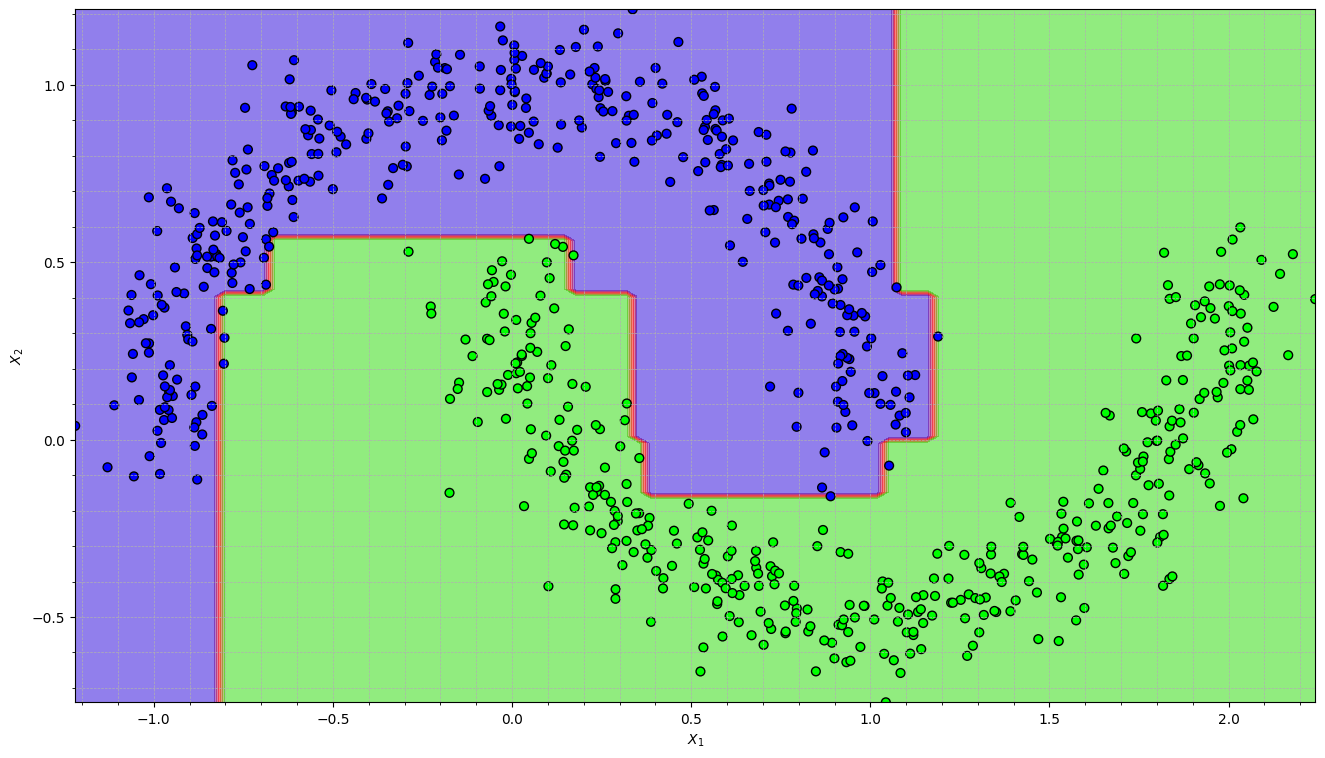

In [232]:
# PLOT
plot2 = Plots()
plot2.plot_decision_boundary(dc_clf2, X_train, y_train)